# Instalação e importação das dependências

In [1]:
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


# Análise exploratória dos dados

## (Arquivos 1 a 4)

In [2]:
df_producao = pd.read_csv('1- producao-de-plastico-global.csv')
df_residuo = pd.read_csv('2- participacao-despejo-residuo-plastico.csv')
df_destino = pd.read_csv('3- destino-plastico.csv')
df_desperdicio = pd.read_csv('4- desperdicio-plastico-per-capita.csv')
df_poluicao = pd.read_csv('5- poluicao-agua-cidades.csv')

df_residuo.sample()

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
62,Guyana,GUY,2019,0.127213


## CSV 1 (Produção de plástico global)

In [3]:
#vou verificar a estrutura do csv
df_producao.head()

,Entidade,Ano,Produção Anual de Plástico
0,Mundo,1950,2000000
1,Mundo,1951,2000000
2,Mundo,1952,2000000
3,Mundo,1953,3000000
4,Mundo,1954,3000000


In [4]:
#vou dropar as duplicatas
df_producao = df_producao.drop_duplicates()

## CSV 2 (participacao dos residuos de plastico para oceano)

In [5]:
df_residuo.head()

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
0,Africa,NaN,2019,7.989317
1,Albania,ALB,2019,0.159782
2,Algeria,DZA,2019,0.589510
3,Angola,AGO,2019,0.087804
4,Antigua and Barbuda,ATG,2019,0.000204


In [6]:
df_residuos_filtrado = df_residuo.dropna(subset=['Código'])

In [7]:
df_residuos_filtrado = df_residuos_filtrado.drop_duplicates()

In [8]:
#filtrei o código para tudo o que for valor 0 sair
df_residuos_filtrado = df_residuos_filtrado[df_residuos_filtrado['Participação na emissão global de plásticos para o oceano'] != 0]

In [9]:
df_residuos_filtrado = df_residuos_filtrado.sort_values(by='Participação na emissão global de plásticos para o oceano', ascending=False)
df_residuos_filtrado

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
119,Philippines,PHL,2019,36.384511
67,India,IND,2019,12.916633
89,Malaysia,MYS,2019,7.463107
25,China,CHN,2019,7.218993
68,Indonesia,IDN,2019,5.751446
...,...,...,...,...
103,Namibia,NAM,2019,0.000204
4,Antigua and Barbuda,ATG,2019,0.000204
127,Saint Kitts and Nevis,KNA,2019,0.000102
112,Oman,OMN,2019,0.000102


In [10]:
##EXEMPLOOOOOOOOOOOOOOO
#soma = df['nome_da_coluna'].sum()

#concatenei o top 10 com o "resto"

top10_residuos = df_residuos_filtrado.head(10)

soma_other = df_residuos_filtrado['Participação na emissão global de plásticos para o oceano'].sum() - top10_residuos['Participação na emissão global de plásticos para o oceano'].sum() 

other_residuos = pd.DataFrame({
    'Entidade' : ['other'],
    'Código' : ['OTH'],
    'Participação na emissão global de plásticos para o oceano' : [soma_other]
})

other_residuos

,Entidade,Código,Participação na emissão global de plásticos para o oceano
0,other,OTH,16.739054


In [11]:
df_residuos_concatenado = pd.concat([top10_residuos, other_residuos], axis=0)

df_residuos_concatenado

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
119,Philippines,PHL,2019.0,36.384511
67,India,IND,2019.0,12.916633
89,Malaysia,MYS,2019.0,7.463107
25,China,CHN,2019.0,7.218993
68,Indonesia,IDN,2019.0,5.751446
16,Brazil,BRA,2019.0,3.859175
166,Vietnam,VNM,2019.0,2.881287
10,Bangladesh,BGD,2019.0,2.515677
154,Thailand,THA,2019.0,2.328431
107,Nigeria,NGA,2019.0,1.903093


## CSV 3 (Destino plástico) 

In [12]:
df_destino.head()

,Entidade,Código,Ano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional
0,Americas (excl. USA),NaN,2000,4.721963,1.220057,32.702644,61.355328
1,Americas (excl. USA),NaN,2001,4.972505,1.208672,32.651270,61.167557
2,Americas (excl. USA),NaN,2002,5.227469,1.197566,32.610554,60.964405
3,Americas (excl. USA),NaN,2003,5.482511,1.186352,32.546440,60.784700
4,Americas (excl. USA),NaN,2004,5.740007,1.175283,32.480970,60.603745


In [13]:
df_destino_filtrado = df_destino.dropna(subset=[' Código'])

df_destino_filtrado

,Entidade,Código,Ano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional
40,China,CHN,2000,4.781187,8.821573,60.803017,25.594213
41,China,CHN,2001,5.210237,9.609698,59.054733,26.125332
42,China,CHN,2002,5.641706,10.404870,57.293118,26.660315
43,China,CHN,2003,6.072641,11.204407,55.523457,27.199492
44,China,CHN,2004,6.505385,12.010195,53.741825,27.742598
...,...,...,...,...,...,...,...
195,World,OWID_WRL,2015,8.164696,17.625141,24.083096,50.127070
196,World,OWID_WRL,2016,8.450203,18.084925,23.626896,49.837975
197,World,OWID_WRL,2017,8.747166,18.578430,23.199600,49.474804
198,World,OWID_WRL,2018,9.036769,19.083899,22.697952,49.181380


## Desperdício de plástico por pessoa (CSV 4)

In [14]:
df_desperdicio.head()

,Entidade,Código,Ano,Lixo plástico mal gerenciado por pessoa (kg por ano)
0,Africa,NaN,2019,10.465928
1,Albania,ALB,2019,24.239153
2,Algeria,DZA,2019,17.758995
3,Angola,AGO,2019,7.445279
4,Antigua and Barbuda,ATG,2019,6.463918


In [15]:
#tirei o que é zero nulo bsolutamente nadaaaaaaa
df_desperdicio_filtrado = df_desperdicio[df_desperdicio[' Lixo plástico mal gerenciado por pessoa (kg por ano)'] != 0]

In [16]:
#sort pra colocar na ordem certa

df_desperdicio_filtrado = df_desperdicio_filtrado.sort_values(by=' Lixo plástico mal gerenciado por pessoa (kg por ano)', ascending=False)
df_desperdicio_filtrado

,Entidade,Código,Ano,Lixo plástico mal gerenciado por pessoa (kg por ano)
27,Comoros,COM,2019,69.515864
151,Trinidad and Tobago,TTO,2019,52.429391
143,Suriname,SUR,2019,39.471601
116,Philippines,PHL,2019,37.230963
164,Zimbabwe,ZWE,2019,35.839194
...,...,...,...,...
34,Denmark,DNK,2019,0.067568
145,Syria,SYR,2019,0.029408
96,Montenegro,MNE,2019,0.025478
106,North Korea,PRK,2019,0.012546


In [17]:
top10_desperdicio = df_desperdicio_filtrado.head(10)
menos10_desperdicio = df_desperdicio_filtrado.tail(10)

menos10_desperdicio

,Entidade,Código,Ano,Lixo plástico mal gerenciado por pessoa (kg por ano)
7,Australia,AUS,2019,0.208943
12,Belgium,BEL,2019,0.197937
95,Monaco,MCO,2019,0.128205
88,Maldives,MDV,2019,0.112994
52,Georgia,GEO,2019,0.076808
34,Denmark,DNK,2019,0.067568
145,Syria,SYR,2019,0.029408
96,Montenegro,MNE,2019,0.025478
106,North Korea,PRK,2019,0.012546
137,Somalia,SOM,2019,0.002720


In [18]:
df_desperdicio_concatenado = pd.concat([top10_desperdicio, menos10_desperdicio], axis=0)

df_desperdicio_concatenado

,Entidade,Código,Ano,Lixo plástico mal gerenciado por pessoa (kg por ano)
27,Comoros,COM,2019,69.515864
151,Trinidad and Tobago,TTO,2019,52.429391
143,Suriname,SUR,2019,39.471601
116,Philippines,PHL,2019,37.230963
164,Zimbabwe,ZWE,2019,35.839194
61,Guyana,GUY,2019,35.204342
147,Tanzania,TZA,2019,29.590553
84,Libya,LBY,2019,27.819832
158,Uruguay,URY,2019,26.753322
87,Malaysia,MYS,2019,25.491518


## Poluição da água e qualidade do ar (CSV 5)

In [19]:
df_poluicao

,Cidade,Região,Entidade,Qualidade do Ar,Poluição da Água
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000
3959,Cordoba,Andalusia,Spain,85.714286,8.333333
3960,Vic,Catalonia,Spain,100.000000,0.000000
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000


In [20]:
#tirei o que não tinha valor 0, bem esquisito a qualidade do ar ser 0 kkkk

df_poluicao = df_poluicao[df_poluicao[' Poluição da Água'] != 0]
df_poluicao = df_poluicao[df_poluicao[' Qualidade do Ar'] != 0]

df_poluicao

,Cidade,Região,Entidade,Qualidade do Ar,Poluição da Água
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435
...,...,...,...,...,...
3954,Piracicaba,Sao Paulo,Brazil,40.000000,25.000000
3956,Palencia,Castile and Leon,Spain,79.166667,37.500000
3957,Jubail,Eastern Province,Saudi Arabia,30.468750,38.793103
3959,Cordoba,Andalusia,Spain,85.714286,8.333333


In [21]:
##dropei cidade e região porque só vou trabalhar com as entidades

df_poluicao = df_poluicao.drop('Cidade', axis=1)
df_poluicao = df_poluicao.drop(' Região', axis=1)

df_poluicao

,Entidade,Qualidade do Ar,Poluição da Água
0,United States of America,46.816038,49.504950
1,United States of America,66.129032,49.107143
2,United States of America,60.514019,43.000000
3,Germany,62.364130,28.612717
4,United States of America,36.621622,61.299435
...,...,...,...
3954,Brazil,40.000000,25.000000
3956,Spain,79.166667,37.500000
3957,Saudi Arabia,30.468750,38.793103
3959,Spain,85.714286,8.333333


In [23]:
#agrupei por entidade e vou tirar a média

df_poluicao_agrupado = df_poluicao.groupby('Entidade').mean()

df_poluicao_agrupado

,Qualidade do Ar,Poluição da Água
Entidade,,
Afghanistan,30.820541,61.410985
Albania,65.310437,63.313802
Algeria,55.140533,58.507057
Andorra,43.750000,25.000000
Angola,15.000000,81.250000
...,...,...
Venezuela,40.571677,76.166263
Vietnam,44.557443,65.526918
Yemen,52.777778,80.555556


## Concatenar os csv's

In [56]:
##concatenei as listas e tirei a qualidade do ar pq não vou usar

listao_concatenado = pd.merge(df_residuos_filtrado, df_desperdicio_filtrado, on='Entidade', how='left')
listao_concatenado = pd.merge(listao_concatenado, df_poluicao_agrupado, on='Entidade', how='left')


listao_concatenado = listao_concatenado.drop(['Código', ' Código', ' Ano', 'Ano', ' Qualidade do Ar'], axis=1)

listao_concatenado

,Entidade,Participação na emissão global de plásticos para o oceano,Lixo plástico mal gerenciado por pessoa (kg por ano),Poluição da Água
0,Philippines,36.384511,37.230963,68.349380
1,India,12.916633,9.509608,62.153538
2,Malaysia,7.463107,25.491518,62.266346
3,China,7.218993,8.559308,NaN
4,Indonesia,5.751446,3.045657,43.057151
...,...,...,...,...
132,Namibia,0.000204,8.373547,54.227053
133,Antigua and Barbuda,0.000204,6.463918,NaN
134,Saint Kitts and Nevis,0.000102,1.830189,NaN
135,Oman,0.000102,0.251457,55.929487


In [134]:
##Ver quais países que estão na lista de participação na emissão de plástico no oceano e plástico mal gerenciado por pessoa, não estão na lista 5

NaN_listao_concanetado = listao_concatenado[' Poluição da Água'].isnull()

NaN_listao_concanetado_filtro = listao_concatenado.loc[NaN_listao_concanetado, :]

NaN_listao_concanetado_filtro = NaN_listao_concanetado_filtro.drop([' Poluição da Água'], axis=1)
NaN_listao_concanetado_filtro = NaN_listao_concanetado_filtro.reset_index(drop=True)

NaN_listao_concanetado_filtro


,Entidade,Participação na emissão global de plásticos para o oceano,Lixo plástico mal gerenciado por pessoa (kg por ano)
0,China,7.218993,8.559308
1,United States,0.248198,0.812815
2,East Timor,0.073000,13.336427
3,Congo,0.069018,12.133618
4,Gambia,0.042983,14.946763
5,Democratic Republic of Congo,0.042881,15.781936
6,Netherlands,0.027668,0.890975
7,Guinea-Bissau,0.025218,10.653306
8,Palestine,0.012047,0.427424
9,Hong Kong,0.011435,0.777434


In [59]:
listao_concatenado_semNaN = listao_concatenado.dropna()

listao_concatenado_semNaN

,Entidade,Participação na emissão global de plásticos para o oceano,Lixo plástico mal gerenciado por pessoa (kg por ano),Poluição da Água
0,Philippines,36.384511,37.230963,68.349380
1,India,12.916633,9.509608,62.153538
2,Malaysia,7.463107,25.491518,62.266346
4,Indonesia,5.751446,3.045657,43.057151
5,Brazil,3.859175,15.620469,56.400024
...,...,...,...,...
130,Saudi Arabia,0.000306,0.209402,47.779266
131,Somalia,0.000204,0.002720,57.500000
132,Namibia,0.000204,8.373547,54.227053
135,Oman,0.000102,0.251457,55.929487


# Gerar os graficos

## Grafico da Producao Anual de plastico ao longo dos anos (CSV 1)

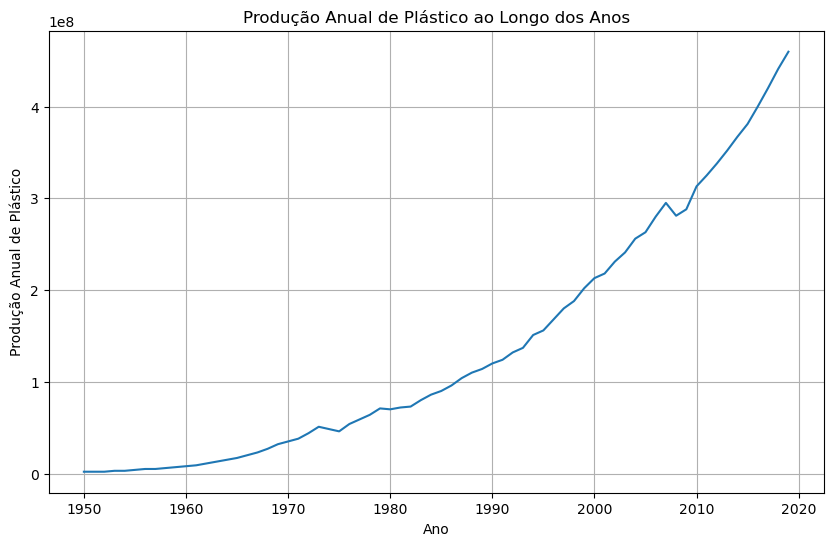

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df_producao['Ano'], df_producao['Produção Anual de Plástico'])
plt.title('Produção Anual de Plástico ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Produção Anual de Plástico')
plt.grid(True)
plt.show()

## grafico do resíduo (CSV 2)

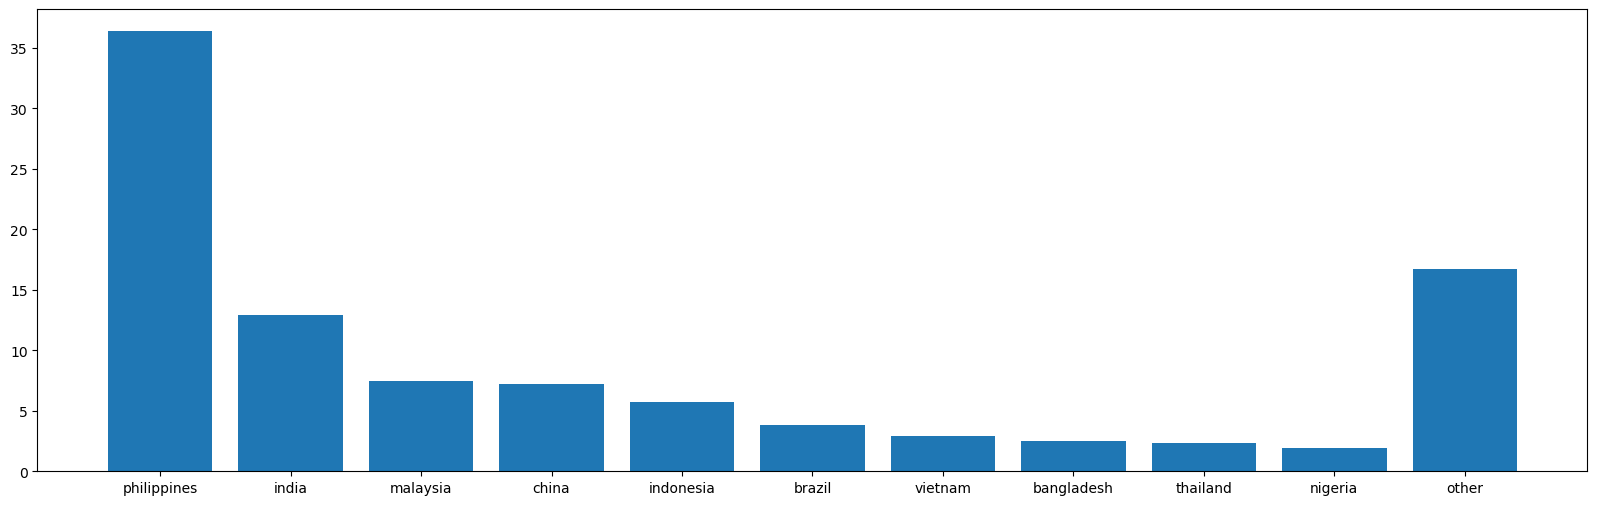

In [24]:
plt.figure(figsize=(20, 6))
plt.bar(df_residuos_concatenado['Entidade'], df_residuos_concatenado['Participação na emissão global de plásticos para o oceano'])
plt.show()

## Grafico do destino (CSV 3)

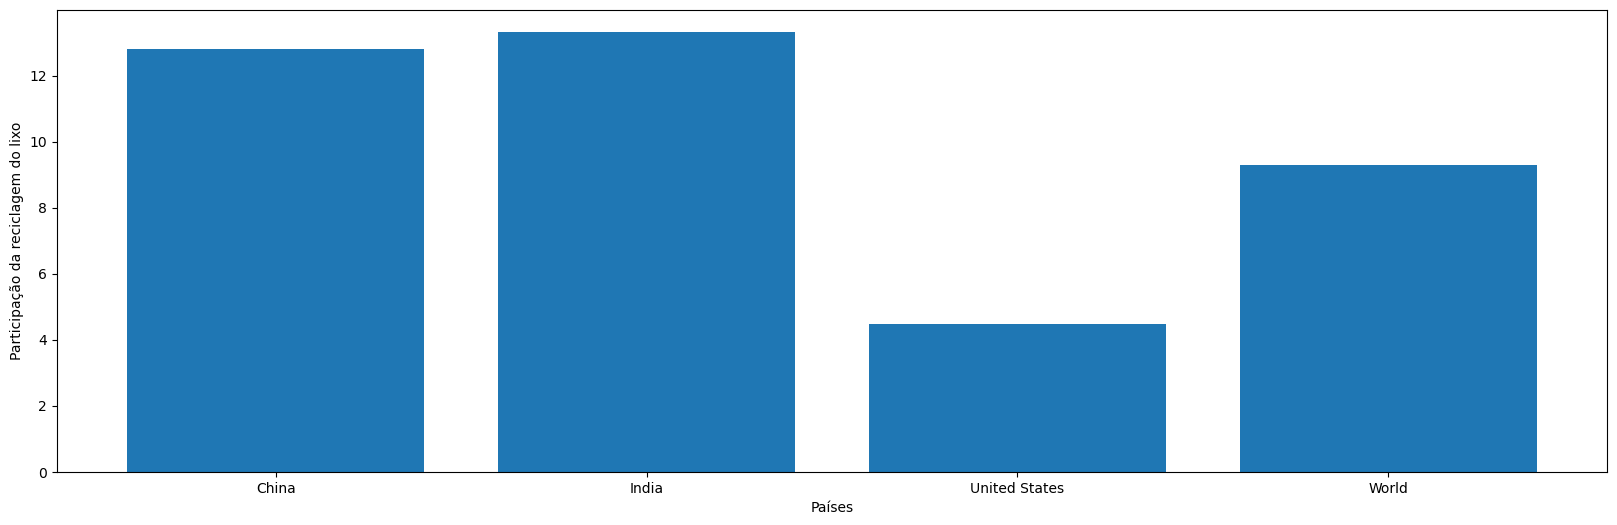

In [25]:
plt.figure(figsize=(20, 6))
plt.bar(df_destino_filtrado['Entidade'], df_destino_filtrado[' Participação da reciclagem do lixo total regional'])
plt.xlabel('Países')
plt.ylabel('Participação da reciclagem do lixo')
plt.show()

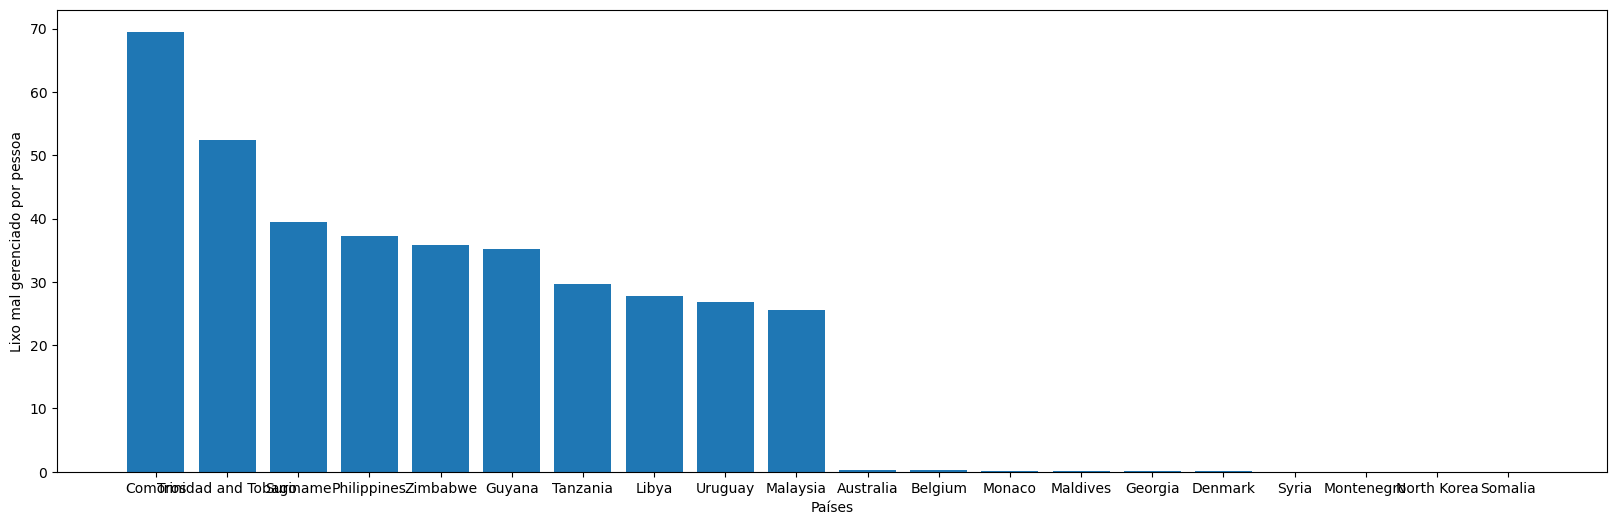

In [26]:
plt.figure(figsize=(20, 6))
plt.bar(df_desperdicio_concatenado['Entidade'], df_desperdicio_concatenado[' Lixo plástico mal gerenciado por pessoa (kg por ano)'])
plt.xlabel('Países')
plt.ylabel('Lixo mal gerenciado por pessoa')
plt.show()

## ML de qualidade da água

In [102]:
##importar o sklearn

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
##definir meu X (sem a poluição)

X = listao_concatenado_semNaN.drop([' Poluição da Água', 'Entidade'], axis=1)

X

In [ ]:
##definir meu y (com a poluição)

y = listao_concatenado_semNaN[' Poluição da Água']

y

### modelo 1 (básico)

In [70]:

mod = KNeighborsRegressor()

In [71]:
mod.fit(X, y)

KNeighborsRegressor()

In [75]:
##Teste básico antes de alterat os paramentros do modelo

pred = mod.predict(X)

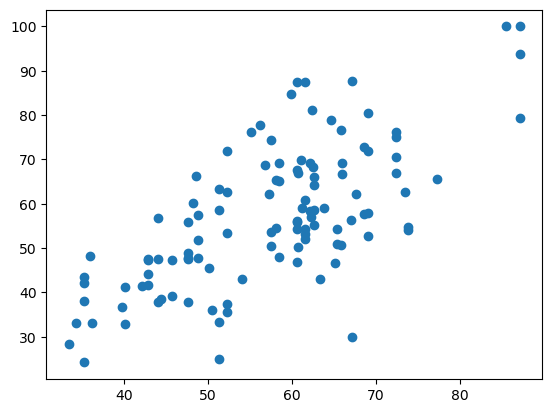

In [76]:
plt.scatter(pred, y)

### modelo 2

In [79]:
## Tentei escalar melhor os dados pra não ficar tão distantes

pipe2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
]) 

In [80]:
pipe2.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [81]:
pred = pipe2.predict(X)

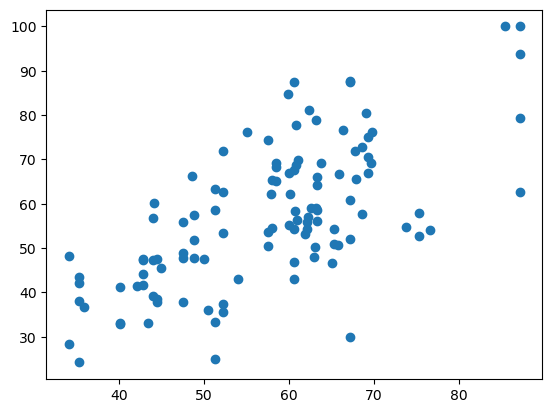

In [82]:
plt.scatter(pred, y)

### modelo 3

#### com gridsearchCV

In [114]:
## vou mexer mais pra ver qual fica melhor, também estou utilizando o quantile transformer pra escalar os dados agora, em vez do standard scaler

pipe3 = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=80)),
    ("model", KNeighborsRegressor())
]) 

In [115]:
#testei com 12 neighbors e fiz o cross validation (dividi em 4)

mod3 = GridSearchCV(estimator=pipe3,
                    param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
                    cv=4
                    )

In [116]:
mod3.fit(X, y)
pd.DataFrame(mod3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003841,0.005199,0.000353,0.000380,1,{'model__n_neighbors': 1},-1.189036,-0.310233,-0.381788,-0.321932,-0.550747,0.369515,12
1,0.002924,0.004078,0.000253,0.000438,2,{'model__n_neighbors': 2},-0.153901,0.218783,-0.140468,-0.587371,-0.165739,0.285661,10
2,0.001522,0.000887,0.000251,0.000434,3,{'model__n_neighbors': 3},-0.326035,0.166948,-0.096391,-0.487606,-0.185771,0.246565,11
3,0.001324,0.000816,0.000750,0.000433,4,{'model__n_neighbors': 4},-0.123002,0.303614,0.112423,-0.178467,0.028642,0.192691,4
4,0.001307,0.000414,0.000500,0.000500,5,{'model__n_neighbors': 5},-0.138100,0.237049,0.149127,-0.253156,-0.001270,0.200988,8
5,0.000000,0.000000,0.003517,0.006092,6,{'model__n_neighbors': 6},-0.223060,0.229874,0.170907,-0.130490,0.011808,0.192534,7
6,0.000000,0.000000,0.000000,0.000000,7,{'model__n_neighbors': 7},-0.247765,0.213603,0.140543,-0.006614,0.024942,0.176296,6
7,0.000439,0.000760,0.004157,0.006635,8,{'model__n_neighbors': 8},-0.239788,0.180813,0.124591,-0.073872,-0.002064,0.166699,9
8,0.003958,0.005760,0.000357,0.000411,9,{'model__n_neighbors': 9},-0.257275,0.178384,0.155332,0.028961,0.026351,0.173350,5
9,0.000000,0.000000,0.000000,0.000000,10,{'model__n_neighbors': 10},-0.189056,0.258945,0.193296,0.031735,0.073730,0.172787,3


In [117]:
pred = mod3.predict(X)

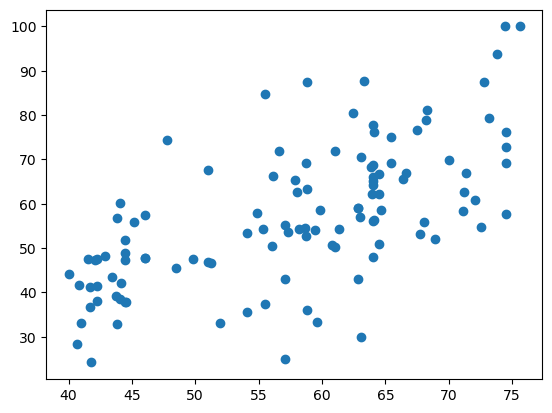

In [118]:
plt.scatter(pred, y)

In [127]:
mod3.predict(X)

array([63.85478693, 64.50565968, 63.97535955, 62.83449026, 64.07425349,
       66.42041596, 62.83449026, 64.04224844, 68.20923045, 64.04224844,
       64.04224844, 62.83449026, 64.04224844, 64.04224844, 64.04224844,
       64.0972619 , 64.030373  , 64.62261709, 67.74257558, 73.20174204,
       71.20253154, 65.45432193, 72.55156406, 75.6042845 , 62.98856164,
       60.81324679, 74.50748237, 72.75594199, 72.05261712, 74.50059036,
       74.50059036, 74.50059036, 73.81609965, 71.10339282, 48.49481466,
       68.90755866, 58.66531608, 74.44058886, 58.83093644, 66.66366134,
       57.90419651, 70.01437549, 71.3746826 , 58.83093644, 64.49311518,
       58.72562508, 64.49311518, 68.29344476, 68.02013878, 67.47443255,
       56.09823123, 51.968906  , 59.84445224, 63.34393188, 58.15892387,
       44.07927786, 57.07841046, 59.58272785, 58.83164443, 65.42385817,
       57.28704117, 49.78247541, 63.07296129, 41.53922043, 63.08405388,
       56.59733807, 56.05311181, 58.02012108, 61.37626695, 62.41

In [133]:
##vamos fazer a predição

predicao = pd.DataFrame(mod3.predict(NaN_listao_concanetado_filtro.drop(['Entidade'], axis=1)))

predicao

,0
0,64.505660
1,58.188881
2,69.617496
3,73.744784
4,65.649640
5,60.091968
6,52.513483
7,62.560739
8,41.817391
9,45.569669


In [155]:
resultado_predicao = pd.merge(NaN_listao_concanetado_filtro, predicao, left_index=True, right_index=True)

resultado_predicao.rename(columns={0: ' Poluição da Água'}, inplace=True)

resultado_predicao


,Entidade,Participação na emissão global de plásticos para o oceano,Lixo plástico mal gerenciado por pessoa (kg por ano),Poluição da Água
0,China,7.218993,8.559308,64.505660
1,United States,0.248198,0.812815,58.188881
2,East Timor,0.073000,13.336427,69.617496
3,Congo,0.069018,12.133618,73.744784
4,Gambia,0.042983,14.946763,65.649640
5,Democratic Republic of Congo,0.042881,15.781936,60.091968
6,Netherlands,0.027668,0.890975,52.513483
7,Guinea-Bissau,0.025218,10.653306,62.560739
8,Palestine,0.012047,0.427424,41.817391
9,Hong Kong,0.011435,0.777434,45.569669


## Unindo as listas e fazendo um gráfico

In [156]:
poluicao_predicao = pd.concat([resultado_predicao, listao_concatenado_semNaN], axis=0, ignore_index=True)
poluicao_predicao

,Entidade,Participação na emissão global de plásticos para o oceano,Lixo plástico mal gerenciado por pessoa (kg por ano),Poluição da Água
0,China,7.218993,8.559308,64.505660
1,United States,0.248198,0.812815,58.188881
2,East Timor,0.073000,13.336427,69.617496
3,Congo,0.069018,12.133618,73.744784
4,Gambia,0.042983,14.946763,65.649640
...,...,...,...,...
132,Saudi Arabia,0.000306,0.209402,47.779266
133,Somalia,0.000204,0.002720,57.500000
134,Namibia,0.000204,8.373547,54.227053
135,Oman,0.000102,0.251457,55.929487


In [173]:
poluicao_predicao = poluicao_predicao.sort_values(by=' Poluição da Água', ascending=True)

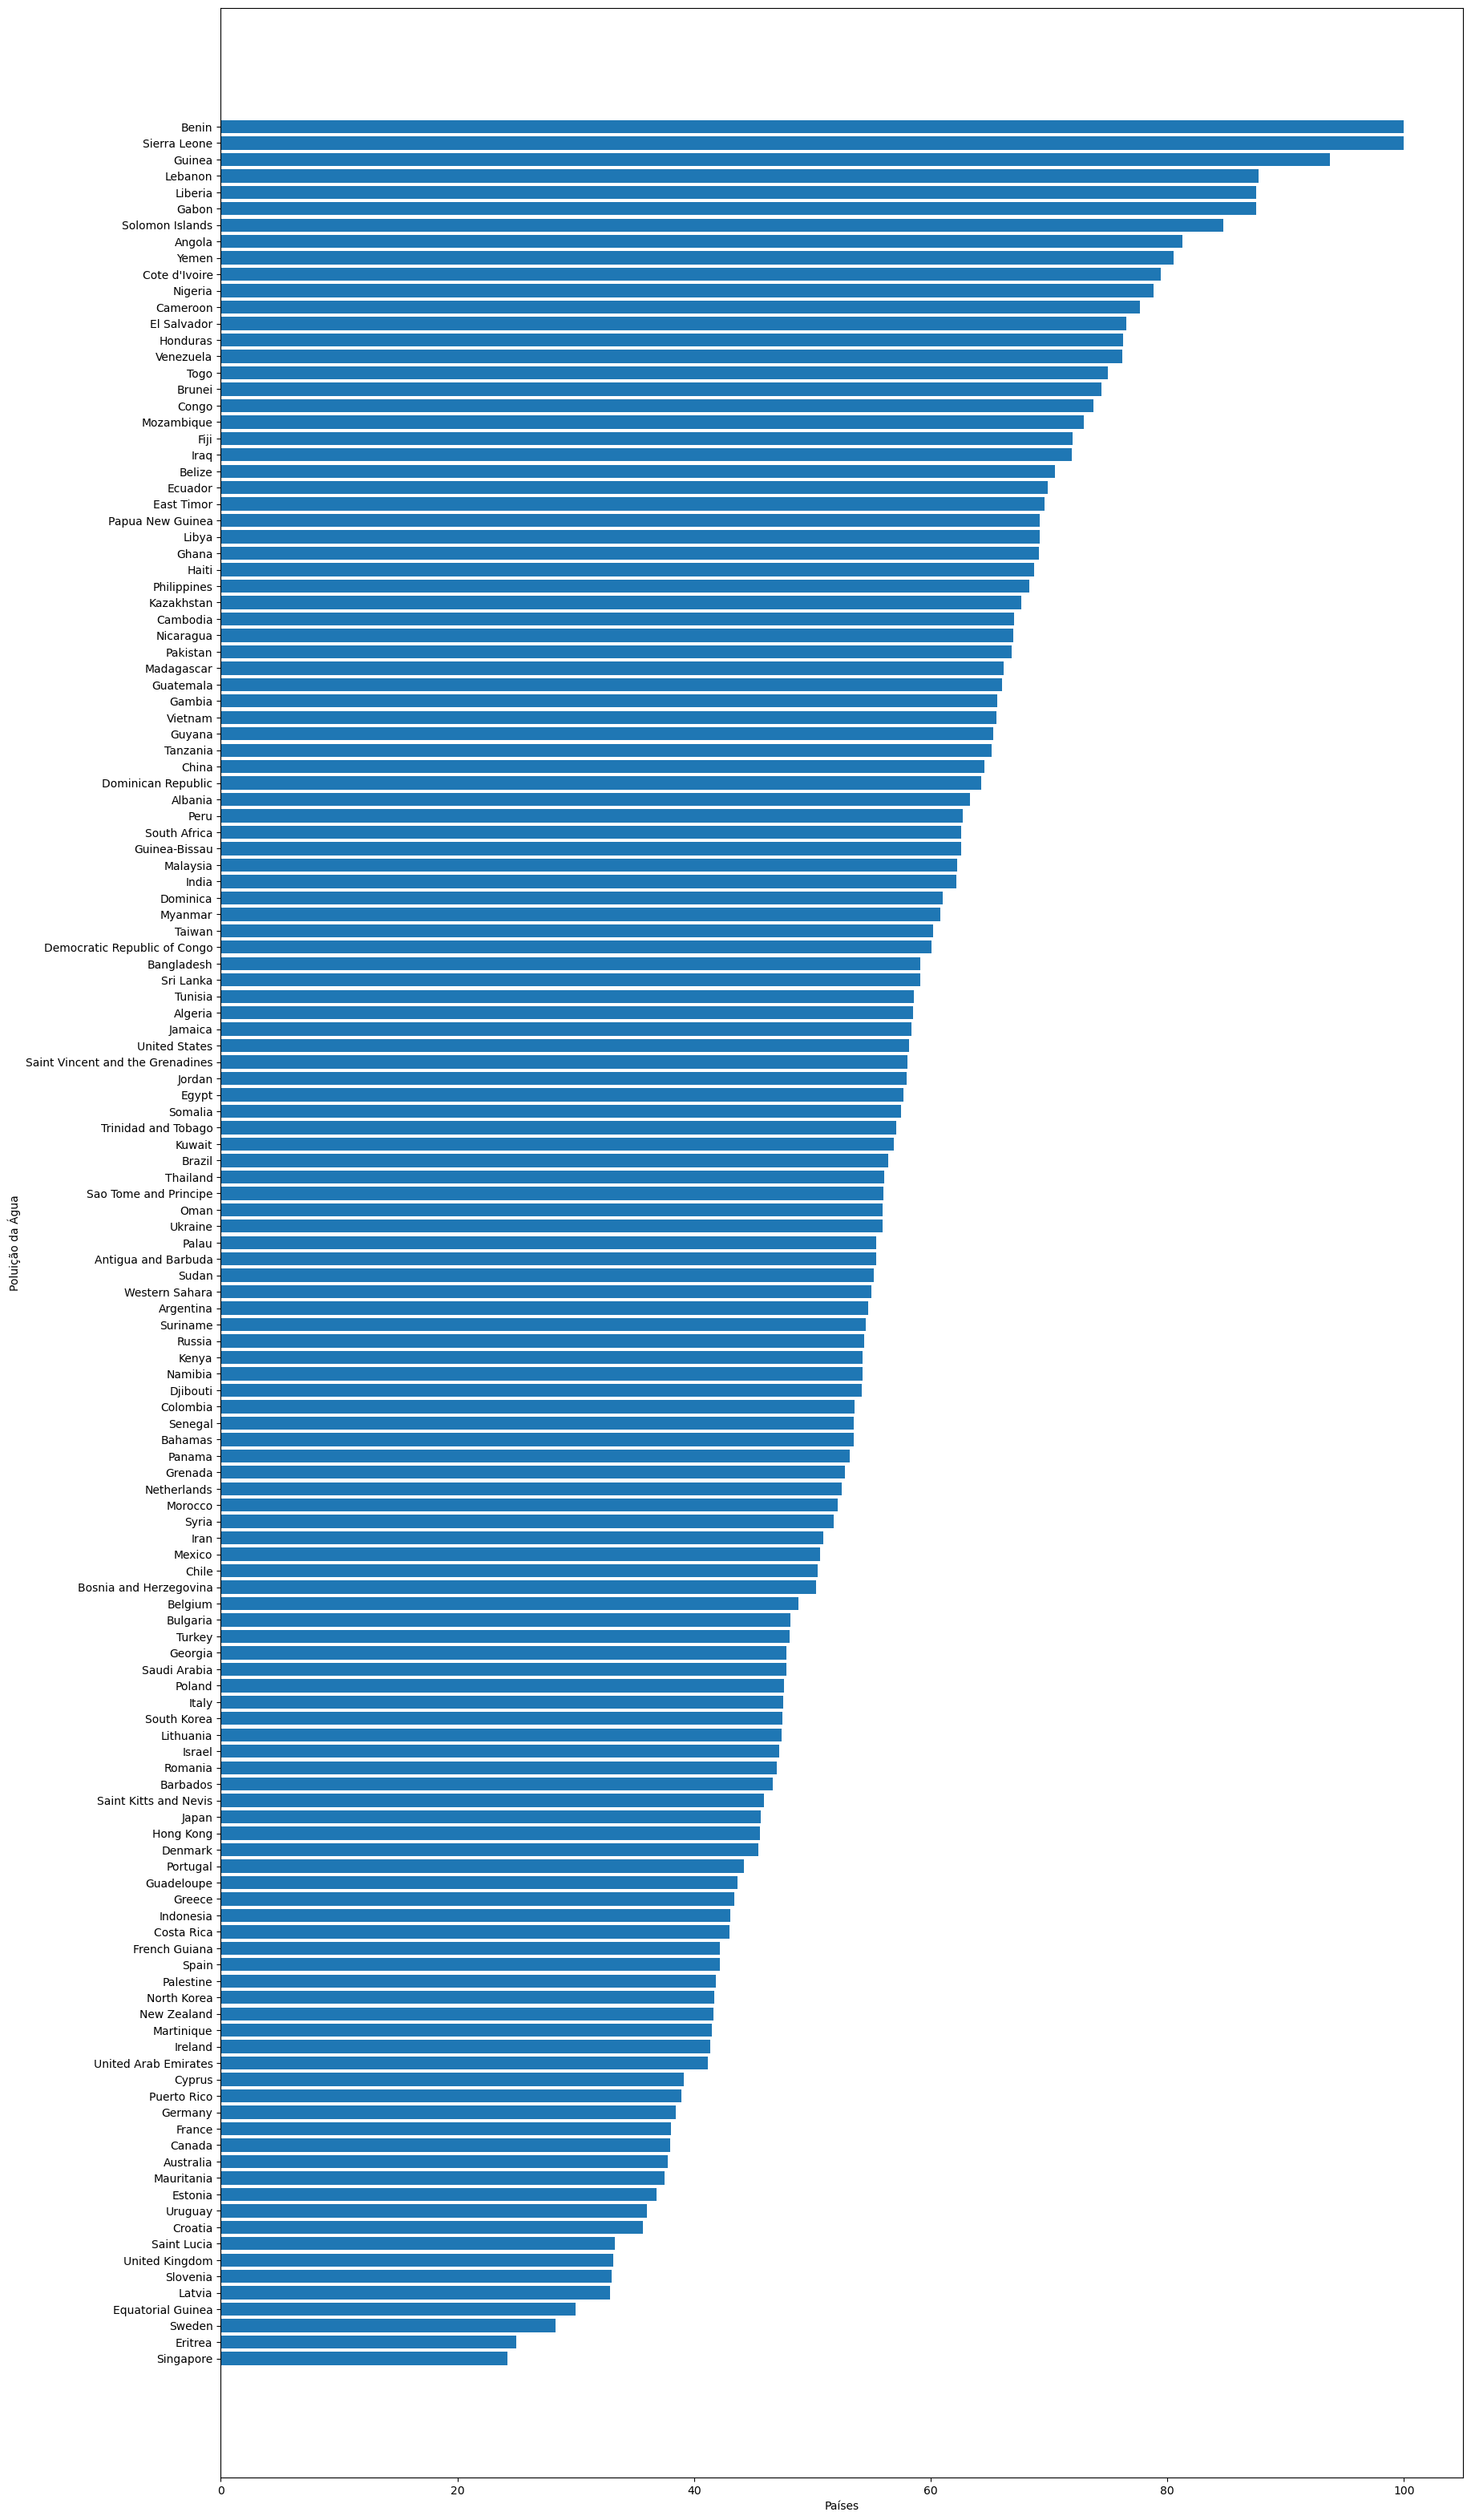

In [170]:
plt.figure(figsize=(20, 40))
plt.barh(poluicao_predicao['Entidade'], poluicao_predicao[' Poluição da Água'])
plt.xlabel('Países')
plt.ylabel('Poluição da Água')
plt.show()